##  *Import useful Liabraries*

In [3]:
# Import all liabraries that we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

%matplotlib inline 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [4]:
df = pd.read_csv("heart.csv")
df.shape # (rows, columns)

(303, 14)

In [5]:
df.head() #Display first 5 rows from file

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail() # Display last 5 rows from list

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
#  find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

## Data Visualization

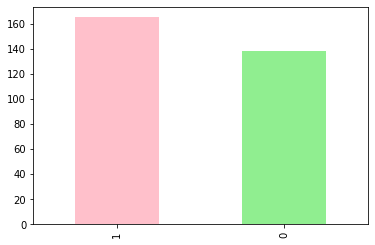

In [8]:
# Plot bar graph to check 0 and 1
df["target"].value_counts().plot(kind="bar", color=["pink", "lightgreen"]);

In [9]:
# Understand data in much details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


*we can see our tabular database consist int 64 and float 64 dtype, it needs to take in consideration while building our model.*

#### *Are there any missing values?*

In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Our database has no any null values

In [11]:
df.describe() # Check database in more detail

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


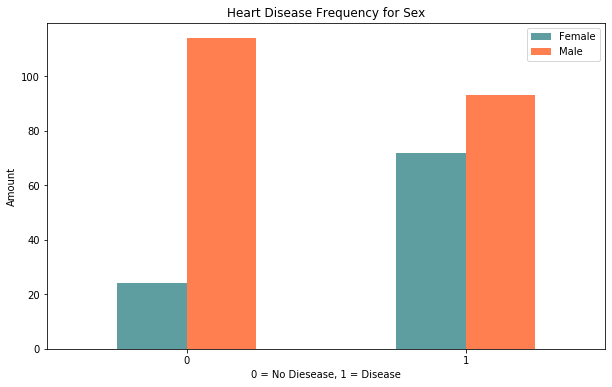

In [14]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["cadetblue", "coral"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


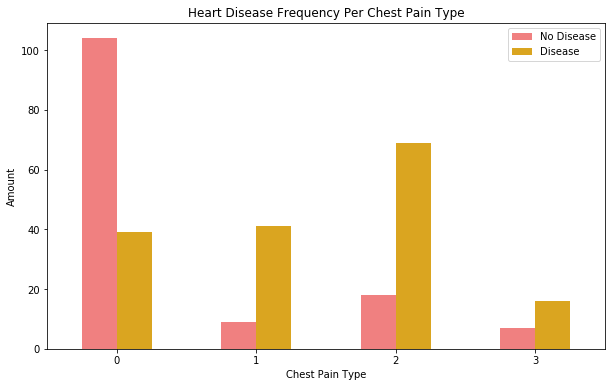

In [16]:
# Compare chestpain and amount
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["lightcoral", "goldenrod"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

## Some more Visualization of data using plot and iplot 

In [17]:
import chart_studio.plotly as py

In [18]:
from plotly import __version__

In [19]:
import cufflinks as cf

In [20]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [21]:
init_notebook_mode(connected= True)

In [22]:
cf.go_offline()

In [23]:
df2 = pd.DataFrame({'Category': ['sex','thal','fbs','chol'], 'values':[1, 1,1,233]})

In [24]:
df.iplot(kind = 'surface', colorscale = 'rdylbu')

In [25]:
df [['age','target']].iplot(kind='spread')

C:\Users\Seema More\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



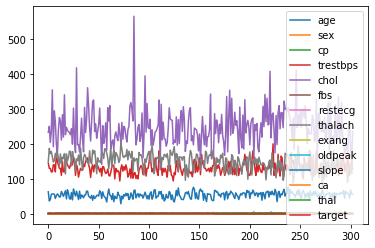

In [26]:
df.plot()

In [27]:
df.iplot()

In [28]:
df.iplot(kind='scatter', x='age', y='cp', mode='markers',size=10)

In [29]:
df.iplot(kind='bar')

(14.5, -0.5)

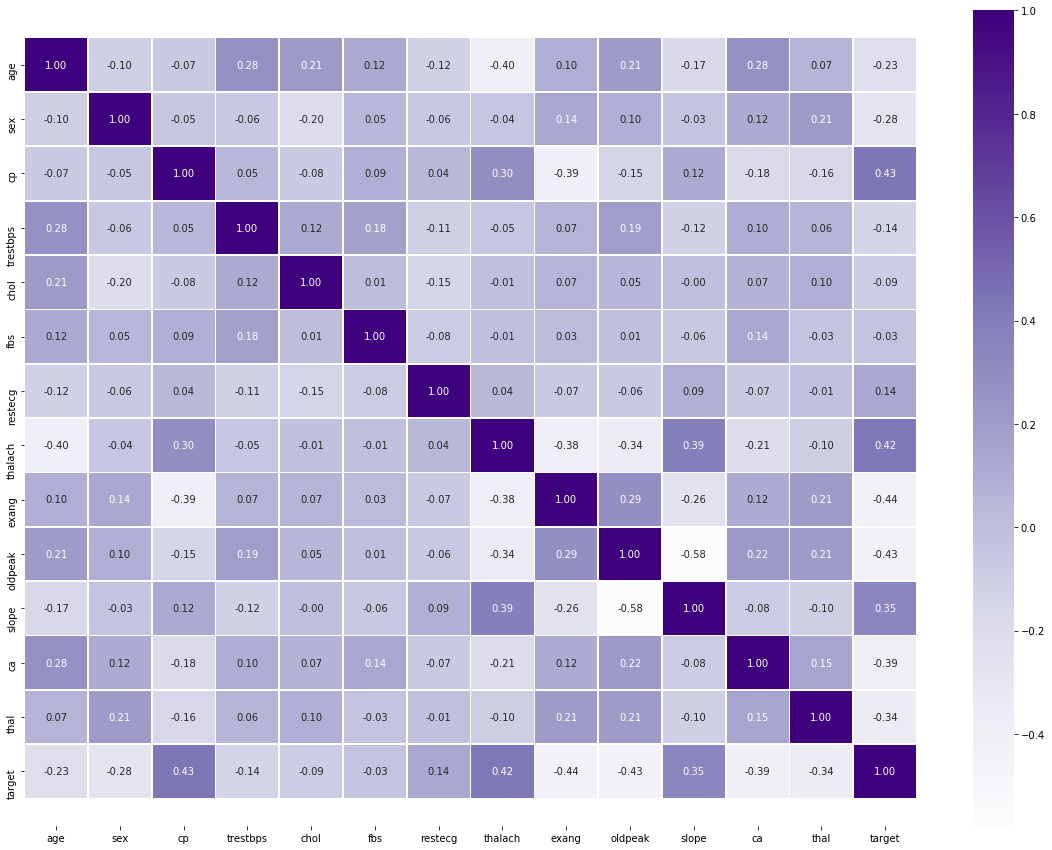

In [30]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.7,
                 fmt=".2f",
                 cmap="Purples");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [31]:
df.iplot(kind = 'box')

## Implementation

In [32]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Change rows to 0's & 1's 

In [33]:
dataset = pd.get_dummies(data=df, columns = ['sex', 'cp', 'fbs', 'restecg','exang','slope','ca','thal']) 

In [34]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


### Use StandardScalar for another rows

In [35]:
from sklearn.preprocessing import StandardScaler

std_sclr = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = std_sclr.fit_transform(dataset[columns_to_scale])

In [36]:
dataset.dtypes

age          float64
trestbps     float64
chol         float64
thalach      float64
oldpeak      float64
target         int64
sex_0          uint8
sex_1          uint8
cp_0           uint8
cp_1           uint8
cp_2           uint8
cp_3           uint8
fbs_0          uint8
fbs_1          uint8
restecg_0      uint8
restecg_1      uint8
restecg_2      uint8
exang_0        uint8
exang_1        uint8
slope_0        uint8
slope_1        uint8
slope_2        uint8
ca_0           uint8
ca_1           uint8
ca_2           uint8
ca_3           uint8
ca_4           uint8
thal_0         uint8
thal_1         uint8
thal_2         uint8
thal_3         uint8
dtype: object

In [37]:
feature = df.drop("target", axis=1) # drop target 
feature_label = df['target']

In [38]:
train_dataset = feature.sample(frac=0.7, random_state = 10)
train_label = feature_label[train_dataset.index]
test_dataset = feature.drop(train_dataset.index)
test_label = feature_label.drop(train_dataset.index)

In [39]:
print(train_dataset.shape)
print(train_label.shape)
print(test_dataset.shape)
print(test_label.shape)

(212, 13)
(212,)
(91, 13)
(91,)


In [40]:
type(train_dataset)

pandas.core.frame.DataFrame

In [41]:
train_dataset = train_dataset.to_numpy()

In [42]:
type(train_dataset)

numpy.ndarray

In [43]:
np.savetxt(r'C:\Users\Seema More\Desktop\Heart-Disease\train.csv',train_dataset)
np.savetxt(r'C:\Users\Seema More\Desktop\Heart-Disease\trainlabel.csv',train_label, fmt= '%i')
np.savetxt(r'C:\Users\Seema More\Desktop\Heart-Disease\test.csv',test_dataset)
np.savetxt(r'C:\Users\Seema More\Desktop\Heart-Disease\testlabel.csv',test_label, fmt = '%i')

In [44]:
Train = np.loadtxt(r'C:\Users\Seema More\Desktop\Heart-Disease\train.csv')
TrainLabel = np.loadtxt(r'C:\Users\Seema More\Desktop\Heart-Disease\trainlabel.csv').astype(int)
Test = np.loadtxt(r'C:\Users\Seema More\Desktop\Heart-Disease\test.csv')
TestLabel = np.loadtxt(r'C:\Users\Seema More\Desktop\Heart-Disease\testlabel.csv').astype(int)

## Implementing Sequential Model  

In [45]:
#from tensorflow.keras.layers import Input, Dense
import tensorflow.keras as keras
Model_1 = keras.Sequential()
Model_1.add(keras.Input(shape=(13,)))
Model_1.add(keras.layers.Dense(13, activation='relu'))
Model_1.add(keras.layers.Dense(1, activation='sigmoid'))

Model_1.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

Hist_1 = Model_1.fit(Train, TrainLabel, validation_split=0.2, epochs=20) 

Epoch 1/20
6/6 [==============================] - 1s 52ms/step - loss: 6.3092 - accuracy: 0.5030 - val_loss: 4.6184 - val_accuracy: 0.5814
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 4.0691 - accuracy: 0.5740 - val_loss: 4.9050 - val_accuracy: 0.5581
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 3.7382 - accuracy: 0.4970 - val_loss: 5.6459 - val_accuracy: 0.4419
Epoch 4/20
6/6 [==============================] - 0s 7ms/step - loss: 3.9072 - accuracy: 0.4970 - val_loss: 5.5383 - val_accuracy: 0.4186
Epoch 5/20
6/6 [==============================] - 0s 6ms/step - loss: 3.6740 - accuracy: 0.5030 - val_loss: 4.9503 - val_accuracy: 0.4884
Epoch 6/20
6/6 [==============================] - 0s 7ms/step - loss: 3.5763 - accuracy: 0.5089 - val_loss: 4.4017 - val_accuracy: 0.5581
Epoch 7/20
6/6 [==============================] - 0s 7ms/step - loss: 3.4275 - accuracy: 0.5148 - val_loss: 4.2672 - val_accuracy: 0.5349
Epoch 8/20
6/6 [=================

In [46]:
# Check the results of the model_1 to whole test dataset
Model_1.evaluate(Test, TestLabel)

3/3 [==============================] - 0s 3ms/step - loss: 4.0514 - accuracy: 0.4176


[4.05137825012207, 0.4175824224948883]

In [47]:
# define plot loss curves

def plot_loss_curves(history): # Plot Loss and Accuracy Curves 
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

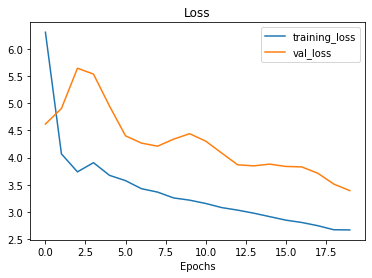

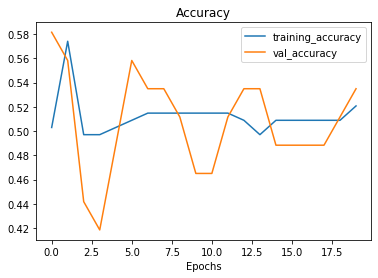

In [48]:
plot_loss_curves(Hist_1)

#### Model_1 has not perform well so need to improve our model more to get more accuracy and less loss

In [49]:
# Set random seed
tf.random.set_seed(42)

import tensorflow.keras as keras
Model_2 = keras.Sequential()       # add more 2 dense layers and 10 more epochs 
Model_2.add(keras.Input(shape=(13,)))
Model_2.add(keras.layers.Dense(13, activation='relu'))
Model_2.add(keras.layers.Dense(13, activation='relu')) 
Model_2.add(keras.layers.Dense(13, activation='relu')) 
Model_2.add(keras.layers.Dense(1, activation='sigmoid'))

Model_2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

Hist_2 = Model_2.fit(Train, TrainLabel, validation_split=0.2, epochs=30)

Epoch 1/30
6/6 [==============================] - 1s 32ms/step - loss: 1.3933 - accuracy: 0.5799 - val_loss: 1.4200 - val_accuracy: 0.5814
Epoch 2/30
6/6 [==============================] - 0s 6ms/step - loss: 0.9938 - accuracy: 0.6450 - val_loss: 0.9174 - val_accuracy: 0.6279
Epoch 3/30
6/6 [==============================] - 0s 6ms/step - loss: 0.8608 - accuracy: 0.6036 - val_loss: 1.0032 - val_accuracy: 0.5814
Epoch 4/30
6/6 [==============================] - 0s 6ms/step - loss: 0.7753 - accuracy: 0.6391 - val_loss: 0.6619 - val_accuracy: 0.6279
Epoch 5/30
6/6 [==============================] - 0s 6ms/step - loss: 0.7432 - accuracy: 0.5621 - val_loss: 0.7072 - val_accuracy: 0.6279
Epoch 6/30
6/6 [==============================] - 0s 6ms/step - loss: 0.7230 - accuracy: 0.6213 - val_loss: 0.7178 - val_accuracy: 0.6279
Epoch 7/30
6/6 [==============================] - 0s 6ms/step - loss: 0.6225 - accuracy: 0.6686 - val_loss: 0.5617 - val_accuracy: 0.5814
Epoch 8/30
6/6 [=================

In [50]:
# Check the results of the model_2 to whole test dataset
Model_2.evaluate(Test, TestLabel)

3/3 [==============================] - 0s 4ms/step - loss: 0.6374 - accuracy: 0.6484


[0.6373977065086365, 0.6483516693115234]

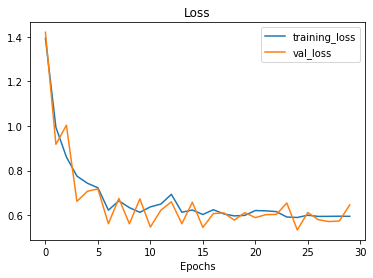

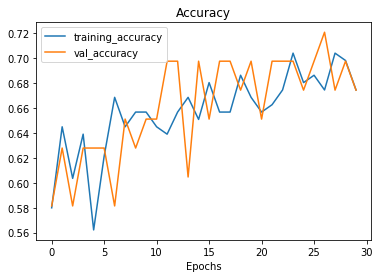

In [51]:
plot_loss_curves(Hist_2)

#### Now again Model_2 has not perform well so need to improve our model more 

In [52]:
# Set random seed
tf.random.set_seed(42)

import tensorflow.keras as keras
Model_3 = keras.Sequential()       # add 1 more dense layers and 10 more epochs
Model_3.add(keras.Input(shape=(13,)))
Model_3.add(keras.layers.Dense(13, activation='relu'))
Model_3.add(keras.layers.Dense(13, activation='relu'))
Model_3.add(keras.layers.Dense(13, activation='relu'))
Model_3.add(keras.layers.Dense(13, activation='relu'))
Model_3.add(keras.layers.Dense(1, activation='sigmoid'))

Model_3.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

Hist_3 = Model_3.fit(Train, TrainLabel, validation_split=0.2, epochs=40)

Epoch 1/40
6/6 [==============================] - 1s 33ms/step - loss: 14.5861 - accuracy: 0.4911 - val_loss: 7.1097 - val_accuracy: 0.6279
Epoch 2/40
6/6 [==============================] - 0s 6ms/step - loss: 7.8331 - accuracy: 0.4911 - val_loss: 2.8447 - val_accuracy: 0.6279
Epoch 3/40
6/6 [==============================] - 0s 6ms/step - loss: 2.6885 - accuracy: 0.5444 - val_loss: 1.6401 - val_accuracy: 0.6047
Epoch 4/40
6/6 [==============================] - 0s 6ms/step - loss: 1.5321 - accuracy: 0.5976 - val_loss: 2.2595 - val_accuracy: 0.4884
Epoch 5/40
6/6 [==============================] - 0s 6ms/step - loss: 1.5140 - accuracy: 0.5917 - val_loss: 1.9888 - val_accuracy: 0.5349
Epoch 6/40
6/6 [==============================] - 0s 6ms/step - loss: 1.2419 - accuracy: 0.6095 - val_loss: 1.3497 - val_accuracy: 0.5814
Epoch 7/40
6/6 [==============================] - 0s 6ms/step - loss: 0.8948 - accuracy: 0.6095 - val_loss: 0.9004 - val_accuracy: 0.6512
Epoch 8/40
6/6 [================

In [53]:
# Check the results of the model_3 to whole test dataset
Model_3.evaluate(Test, TestLabel)

3/3 [==============================] - 0s 2ms/step - loss: 0.6196 - accuracy: 0.6593


[0.6196098923683167, 0.6593406796455383]

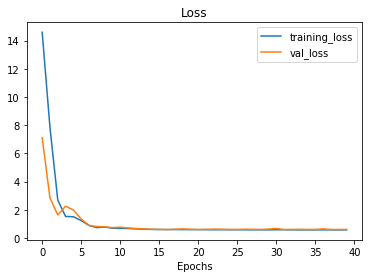

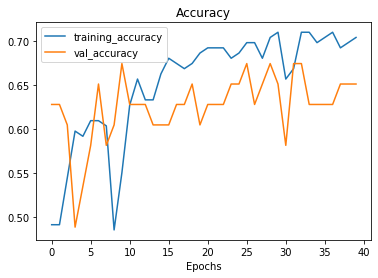

In [54]:
plot_loss_curves(Hist_3)

 Model_3 Also not perform well need to improve more

In [55]:
# Set random seed
tf.random.set_seed(42)

import tensorflow.keras as keras
Model_4 = keras.Sequential()     # add 1 more dense layers and 10 more epochs
Model_4.add(keras.Input(shape=(13,)))
Model_4.add(keras.layers.Dense(13, activation='relu'))
Model_4.add(keras.layers.Dense(13, activation='relu'))
Model_4.add(keras.layers.Dense(13, activation='relu'))
Model_4.add(keras.layers.Dense(13, activation='relu'))
Model_4.add(keras.layers.Dense(13, activation='relu'))
Model_4.add(keras.layers.Dense(1, activation='sigmoid'))

Model_4.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

Hist_4 = Model_4.fit(Train, TrainLabel, validation_split=0.2, epochs=50)

Epoch 1/50
6/6 [==============================] - 1s 32ms/step - loss: 7.2167 - accuracy: 0.5089 - val_loss: 6.3344 - val_accuracy: 0.3721
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 3.4654 - accuracy: 0.5089 - val_loss: 2.6229 - val_accuracy: 0.3953
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 1.2225 - accuracy: 0.5503 - val_loss: 0.6252 - val_accuracy: 0.6279
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 0.9536 - accuracy: 0.5385 - val_loss: 0.7722 - val_accuracy: 0.6047
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 0.8390 - accuracy: 0.5385 - val_loss: 0.8339 - val_accuracy: 0.6279
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 0.7844 - accuracy: 0.6391 - val_loss: 0.8990 - val_accuracy: 0.6279
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 0.6647 - accuracy: 0.6509 - val_loss: 0.6557 - val_accuracy: 0.6279
Epoch 8/50
6/6 [=================

In [56]:
# Check the results of the model_4 to whole test dataset
Model_4.evaluate(Test, TestLabel)

3/3 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.7033


[0.5810783505439758, 0.7032967209815979]

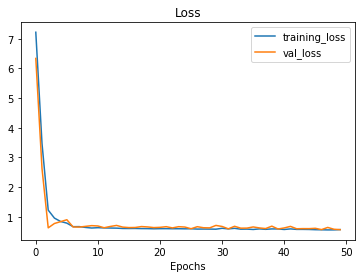

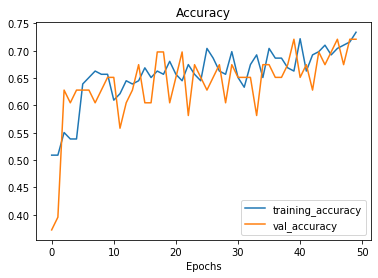

In [57]:
plot_loss_curves(Hist_4)

Need to improve our model more. 

In [58]:
# Set random seed
tf.random.set_seed(42)

import tensorflow.keras as keras
Model_5 = keras.Sequential()     # add 1 more dense layers and epochs to 200
Model_5.add(keras.Input(shape=(13,)))
Model_5.add(keras.layers.Dense(13, activation='relu'))
Model_5.add(keras.layers.Dense(13, activation='relu'))
Model_5.add(keras.layers.Dense(13, activation='relu'))
Model_5.add(keras.layers.Dense(13, activation='relu'))
Model_5.add(keras.layers.Dense(13, activation='relu'))
Model_5.add(keras.layers.Dense(13, activation='relu'))
Model_5.add(keras.layers.Dense(1, activation='sigmoid'))

Model_5.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

Hist_5 = Model_5.fit(Train, TrainLabel, validation_split=0.2, epochs=200)

Epoch 1/200
6/6 [==============================] - 1s 35ms/step - loss: 0.9301 - accuracy: 0.4083 - val_loss: 0.8410 - val_accuracy: 0.5349
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6817 - accuracy: 0.5680 - val_loss: 0.6283 - val_accuracy: 0.6744
Epoch 3/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6862 - accuracy: 0.5621 - val_loss: 0.7411 - val_accuracy: 0.6047
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6704 - accuracy: 0.6154 - val_loss: 0.6657 - val_accuracy: 0.6279
Epoch 5/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6614 - accuracy: 0.5740 - val_loss: 0.6151 - val_accuracy: 0.6512
Epoch 6/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6371 - accuracy: 0.6391 - val_loss: 0.7623 - val_accuracy: 0.5581
Epoch 7/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6567 - accuracy: 0.6272 - val_loss: 0.6407 - val_accuracy: 0.6047
Epoch 8/200
6/6 [=========

6/6 [==============================] - 0s 6ms/step - loss: 0.5543 - accuracy: 0.7101 - val_loss: 0.6200 - val_accuracy: 0.6744
Epoch 60/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5526 - accuracy: 0.7396 - val_loss: 0.5798 - val_accuracy: 0.6977
Epoch 61/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5647 - accuracy: 0.7101 - val_loss: 0.5899 - val_accuracy: 0.6744
Epoch 62/200
6/6 [==============================] - 0s 7ms/step - loss: 0.5571 - accuracy: 0.7337 - val_loss: 0.6563 - val_accuracy: 0.6512
Epoch 63/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5577 - accuracy: 0.7219 - val_loss: 0.5573 - val_accuracy: 0.7209
Epoch 64/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5526 - accuracy: 0.7101 - val_loss: 0.6126 - val_accuracy: 0.6977
Epoch 65/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5463 - accuracy: 0.7101 - val_loss: 0.5737 - val_accuracy: 0.7209
Epoch 66/200
6/6 [===============

6/6 [==============================] - 0s 6ms/step - loss: 0.4828 - accuracy: 0.7574 - val_loss: 0.5689 - val_accuracy: 0.6977
Epoch 118/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4477 - accuracy: 0.7988 - val_loss: 0.4560 - val_accuracy: 0.7907
Epoch 119/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4724 - accuracy: 0.7988 - val_loss: 0.5402 - val_accuracy: 0.7209
Epoch 120/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4540 - accuracy: 0.8166 - val_loss: 0.4832 - val_accuracy: 0.7907
Epoch 121/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4581 - accuracy: 0.7751 - val_loss: 0.4842 - val_accuracy: 0.7907
Epoch 122/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4506 - accuracy: 0.7929 - val_loss: 0.4770 - val_accuracy: 0.7907
Epoch 123/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4397 - accuracy: 0.8225 - val_loss: 0.4748 - val_accuracy: 0.7674
Epoch 124/200
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.3979 - accuracy: 0.8166 - val_loss: 0.3344 - val_accuracy: 0.8605
Epoch 176/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4190 - accuracy: 0.7988 - val_loss: 0.4751 - val_accuracy: 0.7674
Epoch 177/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3682 - accuracy: 0.8284 - val_loss: 0.4045 - val_accuracy: 0.8605
Epoch 178/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3494 - accuracy: 0.8343 - val_loss: 0.5482 - val_accuracy: 0.6977
Epoch 179/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3870 - accuracy: 0.8462 - val_loss: 0.3626 - val_accuracy: 0.9070
Epoch 180/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3679 - accuracy: 0.8462 - val_loss: 0.4184 - val_accuracy: 0.7907
Epoch 181/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3410 - accuracy: 0.8521 - val_loss: 0.3986 - val_accuracy: 0.8605
Epoch 182/200
6/6 [========

In [59]:
# Check the results of the model_5 to whole test dataset
Model_5.evaluate(Test, TestLabel)

3/3 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.7802


[0.446095734834671, 0.7802197933197021]

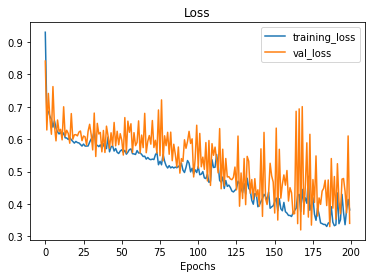

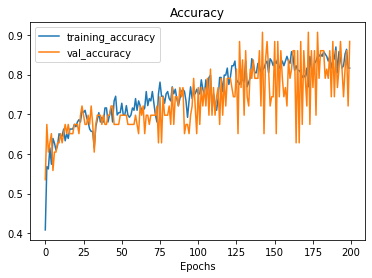

In [60]:
plot_loss_curves(Hist_5)

In [61]:
# Set random seed
tf.random.set_seed(42)

#from tensorflow.keras.layers import Input, Dense
import tensorflow.keras as keras
Model_6 = keras.Sequential()     # add 1 more dense layers and epochs to 150
Model_6.add(keras.Input(shape=(13,)))
Model_6.add(keras.layers.Dense(13, activation='relu'))
Model_6.add(keras.layers.Dense(13, activation='relu'))
Model_6.add(keras.layers.Dense(13, activation='relu'))
Model_6.add(keras.layers.Dense(13, activation='relu'))
Model_6.add(keras.layers.Dense(13, activation='relu'))
Model_6.add(keras.layers.Dense(13, activation='relu'))
Model_6.add(keras.layers.Dense(13, activation='relu'))
Model_6.add(keras.layers.Dense(1, activation='sigmoid'))

Model_6.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

Hist_6 = Model_6.fit(Train, TrainLabel, validation_split=0.2, epochs=150)

Epoch 1/150
6/6 [==============================] - 1s 41ms/step - loss: 1.9753 - accuracy: 0.4438 - val_loss: 0.9380 - val_accuracy: 0.3953
Epoch 2/150
6/6 [==============================] - 0s 6ms/step - loss: 0.9593 - accuracy: 0.4793 - val_loss: 1.0253 - val_accuracy: 0.3721
Epoch 3/150
6/6 [==============================] - 0s 6ms/step - loss: 0.8320 - accuracy: 0.5089 - val_loss: 0.8243 - val_accuracy: 0.3721
Epoch 4/150
6/6 [==============================] - 0s 6ms/step - loss: 0.6862 - accuracy: 0.5385 - val_loss: 0.6920 - val_accuracy: 0.5814
Epoch 5/150
6/6 [==============================] - 0s 6ms/step - loss: 0.6900 - accuracy: 0.5799 - val_loss: 0.6685 - val_accuracy: 0.6744
Epoch 6/150
6/6 [==============================] - 0s 6ms/step - loss: 0.6744 - accuracy: 0.5976 - val_loss: 0.6854 - val_accuracy: 0.5814
Epoch 7/150
6/6 [==============================] - 0s 6ms/step - loss: 0.6646 - accuracy: 0.6391 - val_loss: 0.7552 - val_accuracy: 0.4884
Epoch 8/150
6/6 [=========

6/6 [==============================] - 0s 6ms/step - loss: 0.5789 - accuracy: 0.6805 - val_loss: 0.6582 - val_accuracy: 0.7209
Epoch 60/150
6/6 [==============================] - 0s 5ms/step - loss: 0.5959 - accuracy: 0.6509 - val_loss: 0.6595 - val_accuracy: 0.7209
Epoch 61/150
6/6 [==============================] - 0s 5ms/step - loss: 0.5794 - accuracy: 0.6568 - val_loss: 0.5874 - val_accuracy: 0.6744
Epoch 62/150
6/6 [==============================] - 0s 5ms/step - loss: 0.5782 - accuracy: 0.6746 - val_loss: 0.7016 - val_accuracy: 0.6279
Epoch 63/150
6/6 [==============================] - 0s 6ms/step - loss: 0.5760 - accuracy: 0.6627 - val_loss: 0.6319 - val_accuracy: 0.7209
Epoch 64/150
6/6 [==============================] - 0s 5ms/step - loss: 0.5707 - accuracy: 0.6864 - val_loss: 0.6374 - val_accuracy: 0.7209
Epoch 65/150
6/6 [==============================] - 0s 5ms/step - loss: 0.5641 - accuracy: 0.6864 - val_loss: 0.6123 - val_accuracy: 0.6512
Epoch 66/150
6/6 [===============

6/6 [==============================] - 0s 7ms/step - loss: 0.5393 - accuracy: 0.7337 - val_loss: 0.6194 - val_accuracy: 0.6977
Epoch 118/150
6/6 [==============================] - 0s 7ms/step - loss: 0.5098 - accuracy: 0.7160 - val_loss: 0.4978 - val_accuracy: 0.7674
Epoch 119/150
6/6 [==============================] - 0s 8ms/step - loss: 0.5285 - accuracy: 0.7574 - val_loss: 0.5820 - val_accuracy: 0.6977
Epoch 120/150
6/6 [==============================] - 0s 7ms/step - loss: 0.5093 - accuracy: 0.7041 - val_loss: 0.5358 - val_accuracy: 0.7209
Epoch 121/150
6/6 [==============================] - 0s 7ms/step - loss: 0.4967 - accuracy: 0.7515 - val_loss: 0.5248 - val_accuracy: 0.8140
Epoch 122/150
6/6 [==============================] - 0s 7ms/step - loss: 0.4943 - accuracy: 0.7456 - val_loss: 0.5409 - val_accuracy: 0.7907
Epoch 123/150
6/6 [==============================] - 0s 6ms/step - loss: 0.4954 - accuracy: 0.7456 - val_loss: 0.5504 - val_accuracy: 0.7209
Epoch 124/150
6/6 [========

In [62]:
# Check the results of the model_6 to whole test dataset
Model_6.evaluate(Test, TestLabel)

3/3 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.8022


[0.4615110158920288, 0.8021978139877319]

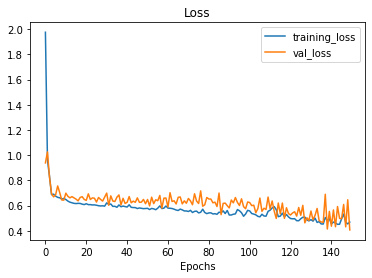

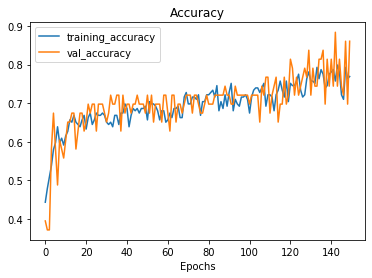

In [63]:
plot_loss_curves(Hist_6)

In [64]:
# Set random seed
tf.random.set_seed(42)

#from tensorflow.keras.layers import Input, Dense
import tensorflow.keras as keras
Model_7 = keras.Sequential()      # add 2 more dense layers and epochs to 200
Model_7.add(keras.Input(shape=(13,)))
Model_7.add(keras.layers.Dense(13, activation='relu'))
Model_7.add(keras.layers.Dense(13, activation='relu'))
Model_7.add(keras.layers.Dense(13, activation='relu'))
Model_7.add(keras.layers.Dense(13, activation='relu'))
Model_7.add(keras.layers.Dense(13, activation='relu'))
Model_7.add(keras.layers.Dense(13, activation='relu'))
Model_7.add(keras.layers.Dense(13, activation='relu'))
Model_7.add(keras.layers.Dense(13, activation='relu'))
Model_7.add(keras.layers.Dense(13, activation='relu'))
Model_7.add(keras.layers.Dense(1, activation='sigmoid'))

Model_7.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

Hist_7 = Model_7.fit(Train, TrainLabel, validation_split=0.2, epochs=200)

Epoch 1/200
6/6 [==============================] - 1s 37ms/step - loss: 0.8124 - accuracy: 0.4142 - val_loss: 0.7400 - val_accuracy: 0.4419
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6661 - accuracy: 0.6391 - val_loss: 0.5972 - val_accuracy: 0.5581
Epoch 3/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6624 - accuracy: 0.5799 - val_loss: 0.6470 - val_accuracy: 0.6512
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6397 - accuracy: 0.6272 - val_loss: 0.7242 - val_accuracy: 0.6512
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6306 - accuracy: 0.6095 - val_loss: 0.5859 - val_accuracy: 0.6047
Epoch 6/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6226 - accuracy: 0.6331 - val_loss: 0.6404 - val_accuracy: 0.6279
Epoch 7/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6326 - accuracy: 0.6805 - val_loss: 0.7311 - val_accuracy: 0.6279
Epoch 8/200
6/6 [=========

6/6 [==============================] - 0s 6ms/step - loss: 0.5581 - accuracy: 0.7219 - val_loss: 0.5825 - val_accuracy: 0.6977
Epoch 60/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5723 - accuracy: 0.6864 - val_loss: 0.5642 - val_accuracy: 0.7209
Epoch 61/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5630 - accuracy: 0.6923 - val_loss: 0.5503 - val_accuracy: 0.7209
Epoch 62/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5662 - accuracy: 0.7101 - val_loss: 0.6496 - val_accuracy: 0.5814
Epoch 63/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5593 - accuracy: 0.7160 - val_loss: 0.5274 - val_accuracy: 0.7442
Epoch 64/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5651 - accuracy: 0.7041 - val_loss: 0.5734 - val_accuracy: 0.7209
Epoch 65/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5514 - accuracy: 0.7337 - val_loss: 0.5325 - val_accuracy: 0.7442
Epoch 66/200
6/6 [===============

6/6 [==============================] - 0s 6ms/step - loss: 0.5267 - accuracy: 0.7396 - val_loss: 0.5408 - val_accuracy: 0.6977
Epoch 118/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4986 - accuracy: 0.7751 - val_loss: 0.5341 - val_accuracy: 0.7209
Epoch 119/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5100 - accuracy: 0.7515 - val_loss: 0.5164 - val_accuracy: 0.7209
Epoch 120/200
6/6 [==============================] - 0s 7ms/step - loss: 0.4951 - accuracy: 0.7574 - val_loss: 0.5203 - val_accuracy: 0.7442
Epoch 121/200
6/6 [==============================] - 0s 7ms/step - loss: 0.4968 - accuracy: 0.7574 - val_loss: 0.5966 - val_accuracy: 0.6977
Epoch 122/200
6/6 [==============================] - 0s 7ms/step - loss: 0.5039 - accuracy: 0.7396 - val_loss: 0.5451 - val_accuracy: 0.7209
Epoch 123/200
6/6 [==============================] - 0s 7ms/step - loss: 0.4818 - accuracy: 0.7692 - val_loss: 0.5734 - val_accuracy: 0.6512
Epoch 124/200
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.4492 - accuracy: 0.7929 - val_loss: 0.4151 - val_accuracy: 0.7674
Epoch 176/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4566 - accuracy: 0.7751 - val_loss: 0.6205 - val_accuracy: 0.6977
Epoch 177/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4480 - accuracy: 0.7751 - val_loss: 0.3982 - val_accuracy: 0.7674
Epoch 178/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4585 - accuracy: 0.7811 - val_loss: 0.5842 - val_accuracy: 0.6977
Epoch 179/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4767 - accuracy: 0.7988 - val_loss: 0.4570 - val_accuracy: 0.7674
Epoch 180/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4516 - accuracy: 0.8166 - val_loss: 0.5126 - val_accuracy: 0.7209
Epoch 181/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4375 - accuracy: 0.7988 - val_loss: 0.4596 - val_accuracy: 0.7442
Epoch 182/200
6/6 [========

In [65]:
# Check the results of the model_7 to whole test dataset
Model_7.evaluate(Test, TestLabel)

3/3 [==============================] - 0s 1ms/step - loss: 0.5215 - accuracy: 0.7473


[0.521515429019928, 0.7472527623176575]

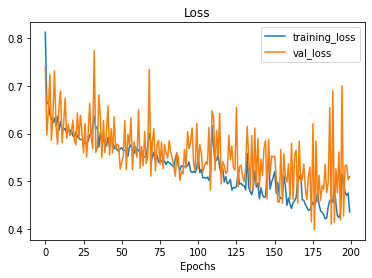

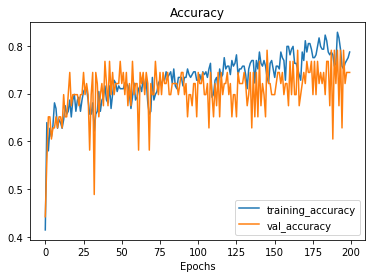

In [66]:
plot_loss_curves(Hist_7)

#### Model 7 performs well compare to other models 


In [84]:
Model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 13)                182       
                                                                 
 dense_33 (Dense)            (None, 13)                182       
                                                                 
 dense_34 (Dense)            (None, 13)                182       
                                                                 
 dense_35 (Dense)            (None, 13)                182       
                                                                 
 dense_36 (Dense)            (None, 13)                182       
                                                                 
 dense_37 (Dense)            (None, 13)                182       
                                                                 
 dense_38 (Dense)            (None, 13)               

### Prediction on Test DataSet

In [85]:
Preds = Model_7.predict(Test)
Preds = Preds.flatten()
Preds[:3]

array([0.6729526 , 0.90573514, 0.9331231 ], dtype=float32)

In [86]:
PredsLabels = []
for element in Preds:
    PredsLabels.append(int(round(element)))
PredsLabelsA = np.array(PredsLabels)

In [87]:
print(PredsLabelsA[:10])
print(TestLabel[:10])

[1 1 1 1 1 0 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]


#### Classification Report

In [88]:
print(classification_report(TestLabel, PredsLabelsA)) 

              precision    recall  f1-score   support

           0       0.64      0.81      0.72        36
           1       0.85      0.71      0.77        55

    accuracy                           0.75        91
   macro avg       0.75      0.76      0.74        91
weighted avg       0.77      0.75      0.75        91



####  Confusion Matrix

Text(33.0, 0.5, 'Truth')

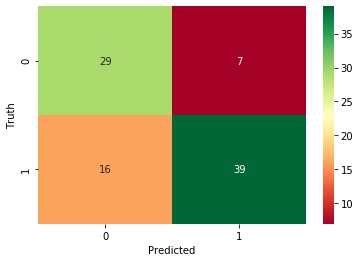

In [89]:
import tensorflow as tf
import seaborn as sn
n_conf_mat = tf.math.confusion_matrix(labels=TestLabel, predictions=PredsLabelsA)

sn.heatmap(n_conf_mat, annot=True, cmap='RdYlGn', fmt='d') #YlOrBr
plt.xlabel('Predicted')
plt.ylabel('Truth')